In [1]:
import pandas as pd
import missingno as msno
import re

# Loading the Dataset

In [2]:
df = pd.read_csv('car.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Setting the columns name

In [4]:
df.set_axis(['buying','maint','doors','engine','size','safety','acceptibility'], axis=1 , inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_7688\671952272.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['buying','maint','doors','engine','size','safety','acceptibility'], axis=1 , inplace = True)


In [5]:
df.head()

,buying,maint,doors,engine,size,safety,acceptibility
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.tail()

,buying,maint,doors,engine,size,safety,acceptibility
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1727 non-null   object
 1   maint          1727 non-null   object
 2   doors          1727 non-null   object
 3   engine         1727 non-null   object
 4   size           1727 non-null   object
 5   safety         1727 non-null   object
 6   acceptibility  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df.describe()

,buying,maint,doors,engine,size,safety,acceptibility
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


# Checking if there is any duplicates

In [9]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Length: 1727, dtype: bool


# Checking if any column is null

In [10]:
df["buying"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: buying, Length: 1727, dtype: bool

In [11]:
df["maint"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: maint, Length: 1727, dtype: bool

In [12]:
df["doors"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: doors, Length: 1727, dtype: bool

In [13]:
df["engine"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: engine, Length: 1727, dtype: bool

In [14]:
df["safety"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: safety, Length: 1727, dtype: bool

In [15]:
df["size"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: size, Length: 1727, dtype: bool

In [16]:
df["acceptibility"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: acceptibility, Length: 1727, dtype: bool

# Another Easy-Peasy way of finding out the missing value using missingno library with visualization

<Axes: >

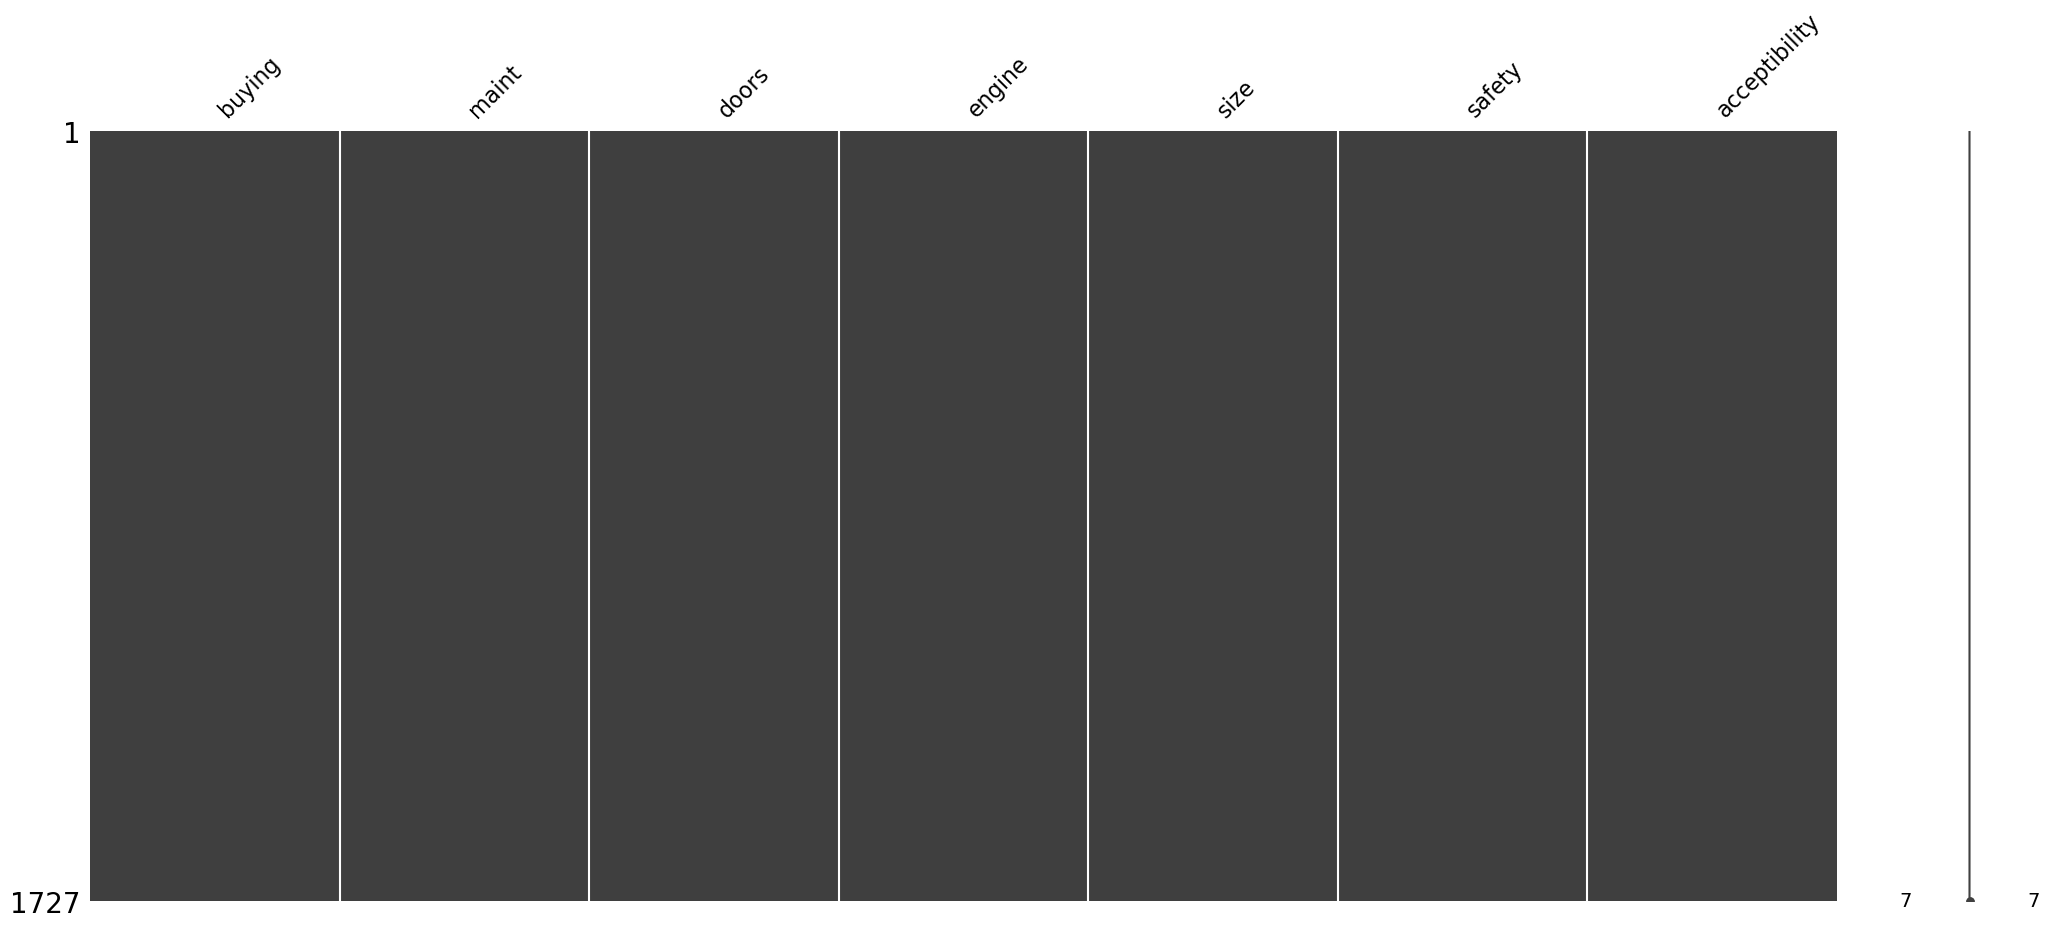

In [17]:
msno.matrix(df)

In [18]:
def check_dataset_cleaned(df):
    
    if df.isnull().values.any():
        print("There are missing values in the dataset.")  
    if df.duplicated().values.any():
        print("There is duplicate data in the dataset.") 
    for column in df.columns:
        if df[column].dtype.name == "float64":
            outliers = df[column].sort_values(ascending=False).head(2)
            print("There are outliers in the {} column.".format(column))
    for column in df.columns:
        if df[column].dtype.name == "object":
            special_characters = df[column].str.findall('[@#$%^&*()<>/|}{~:]')
            if len(special_characters) > 0:
                if df[column].dtype.name == "object":
                    special_characters = df[column].str.replace('[@#$%^&*()<>/|}{~:]','',regex = True)
                    print("Special Characters Removed it the {} column".format(column))
                else:
                    print("Special Characters are not Removed it the {} column".format(column))
    if not df.dtypes.index.is_unique:
        print("The data types in the dataset are not unique.")

    return

In [19]:
check_dataset_cleaned(df)

Special Characters Removed it the buying column
Special Characters Removed it the maint column
Special Characters Removed it the doors column
Special Characters Removed it the engine column
Special Characters Removed it the size column
Special Characters Removed it the safety column
Special Characters Removed it the acceptibility column


# Removing the special characters from our dataset

In [20]:
def remove_special_characters(df):
    if df[column].dtype.name == "object":
        special_characters = df[column].str.replace('[@#$%^&*()<>/|}{~:]','',regex = True)
        

In [21]:
check_dataset_cleaned(df)

Special Characters Removed it the buying column
Special Characters Removed it the maint column
Special Characters Removed it the doors column
Special Characters Removed it the engine column
Special Characters Removed it the size column
Special Characters Removed it the safety column
Special Characters Removed it the acceptibility column


In [24]:
df.to_csv('car.csv')